In [5]:
from shapely.geometry import Polygon, box
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
p1 = Polygon([(0,0), (0, 1), (1, 1), (1,0)])

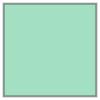

In [4]:
p1

In [7]:
p2 = box(.5, .5, 1.5, 1.5)

In [9]:
p1.intersects(p2)

True

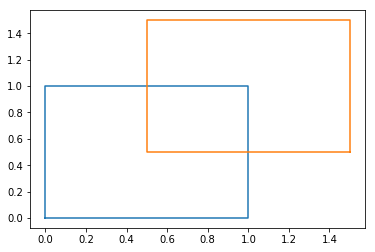

In [12]:
plt.plot(*zip(*p1.exterior.coords))
plt.plot(*zip(*p2.exterior.coords))

In [13]:
p1.touches(p2)

False

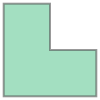

In [14]:
p1.difference(p2)

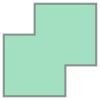

In [15]:
p1.union(p2)

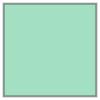

In [16]:
p1.intersection(p2)

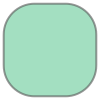

In [19]:
buff = p1.buffer(1.0)
buff

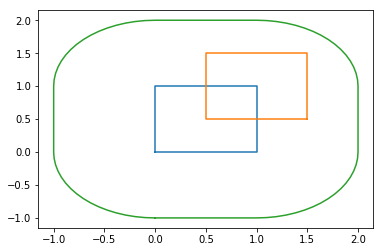

In [20]:
plt.plot(*zip(*p1.exterior.coords))
plt.plot(*zip(*p2.exterior.coords))
plt.plot(*zip(*buff.exterior.coords))

In [22]:
from GISio import df2shp
import pandas as pd

In [25]:
df = pd.DataFrame({'geometry': [buff, p1, p2],
                   'name': ['buff', 'p1', 'p2']})

In [26]:
df

geometry  name
0  POLYGON ((0 -1, -0.09801714032956664 -0.995184...  buff
1                POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))    p1
2  POLYGON ((1.5 0.5, 1.5 1.5, 0.5 1.5, 0.5 0.5, ...    p2

In [27]:
df2shp(df, 'junk/from_df.shp')

writing junk/from_df.shp...


In [40]:
from descartes import PolygonPatch
import numpy as np
from matplotlib.collections import PatchCollection

In [29]:
ppatches = [PolygonPatch(p) for p in df.geometry]

(-3, 3)

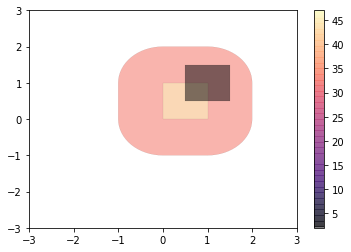

In [44]:
fig, ax = plt.subplots()
values = np.array([33, 47, 2])
cl = PatchCollection(ppatches, 
                     edgecolor='k',
                     cmap='magma',
                     linewidth=0.1, alpha=0.5)
cl.set_array(values)
plt.colorbar(cl)
ax.add_collection(cl)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)